In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix #Para monstrar un matriz de scater con todos los valores
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
dataframe = pd.read_csv(r"kidney_disease.csv") 
#Borra todas las filas que tengan algun campo NaN
dataframe.dropna(inplace = True)
dataframe.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [4]:
dataframe.shape

(158, 26)

In [5]:
dataframe.rbc = dataframe.rbc.replace({"normal":1,"abnormal":0})
dataframe.pc = dataframe.pc.replace({"normal":1,"abnormal":0})
dataframe.pcc = dataframe.pcc.replace({"present":1,"notpresent":0})
dataframe.ba = dataframe.ba.replace({"present":1,"notpresent":0})
dataframe.htn = dataframe.htn.replace({"yes":1,"no":0})
dataframe.dm = dataframe.dm.replace({"yes":1,"no":0})
dataframe.cad = dataframe.cad.replace({"yes":1,"no":0})
dataframe.appet = dataframe.appet.replace({"good":1,"poor":0})
dataframe.pe = dataframe.pe.replace({"yes":1,"no":0})
dataframe.ane = dataframe.ane.replace({"yes":1,"no":0})

dataframe.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,ckd
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,1,0,0,0,1,ckd
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,1,0,0,1,0,ckd
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16,11000,2.6,1,1,1,0,1,0,ckd
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24,9200,3.2,1,1,1,0,1,1,ckd


In [6]:
dataframe.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sc,sod,pot,hemo,htn,dm,cad,appet,pe,ane
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,0.886076,0.816456,0.088608,0.075949,...,2.188608,138.848101,4.636709,13.687342,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,...,3.077615,7.489421,3.476351,2.882204,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,111.000000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.700000,135.000000,3.700000,12.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.100000,139.000000,4.500000,14.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.600000,144.000000,4.900000,15.775000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,15.200000,150.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(dataframe.groupby("classification").size())

classification
ckd        43
notckd    115
dtype: int64


In [8]:
dataframe.loc[dataframe['classification'] == 'ckd\t', 'classification'] = 'ckd'
print(dataframe.groupby("classification").size())

classification
ckd        43
notckd    115
dtype: int64


In [9]:
dataframe.loc[dataframe['classification'] == 'ckd', 'classification'] = 1
print(dataframe.groupby("classification").size())

classification
1          43
notckd    115
dtype: int64


In [10]:
dataframe.loc[dataframe['classification'] == 'notckd', 'classification'] = 0
print(dataframe.groupby("classification").size())

classification
0    115
1     43
dtype: int64


In [11]:
dataframe.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29,12100,3.7,1,1,0,0,0,1,1
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32,4500,3.8,1,1,0,0,1,0,1
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16,11000,2.6,1,1,1,0,1,0,1
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24,9200,3.2,1,1,1,0,1,1,1


In [12]:
dataframe.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

<IPython.core.display.Javascript object>


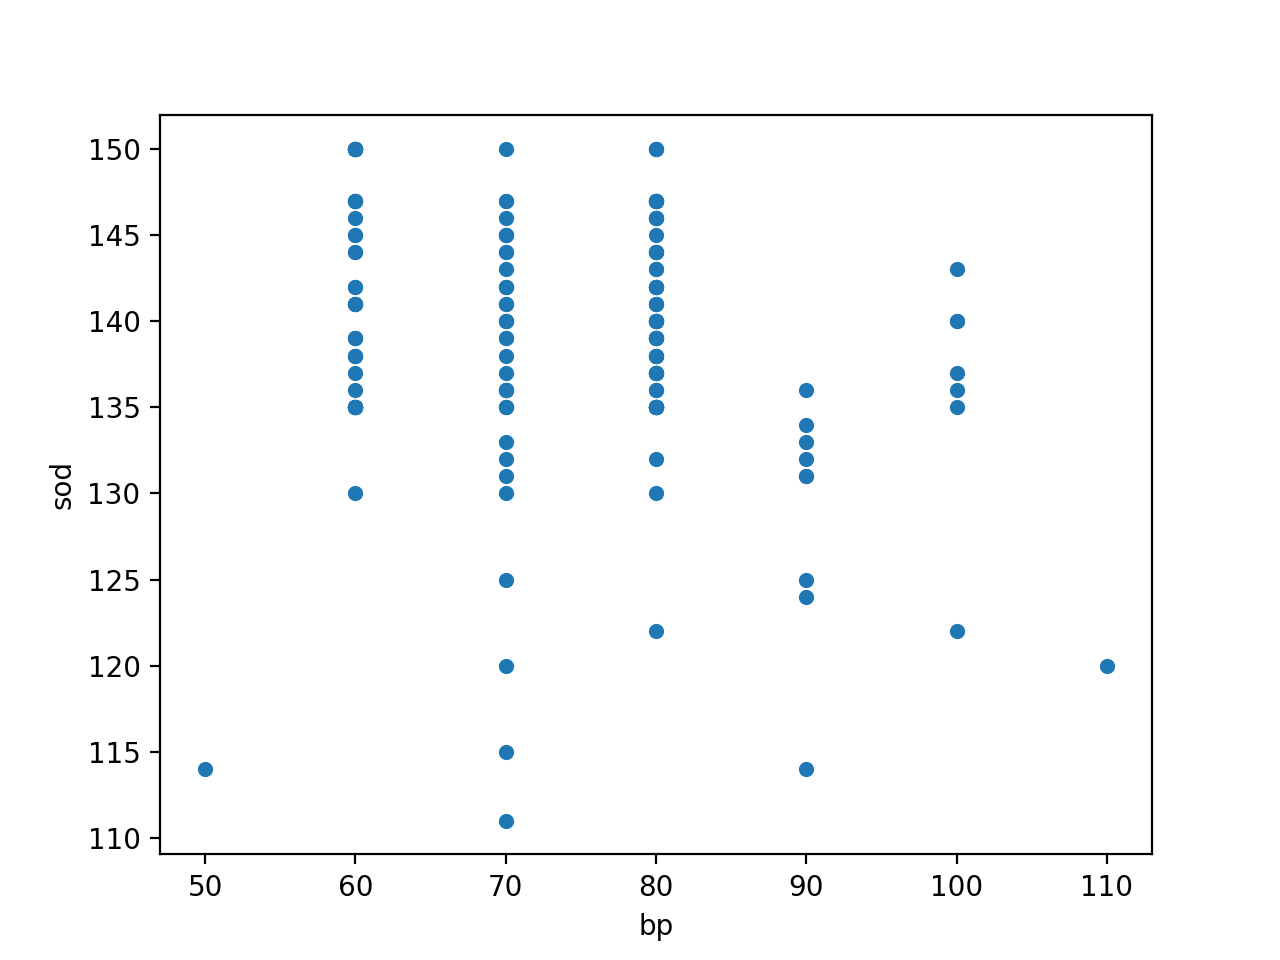

In [13]:
%matplotlib notebook
dataframe.plot.scatter(x="bp",y="sod")

In [14]:
dataframe = dataframe.drop(["id"],1)
dataframe.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


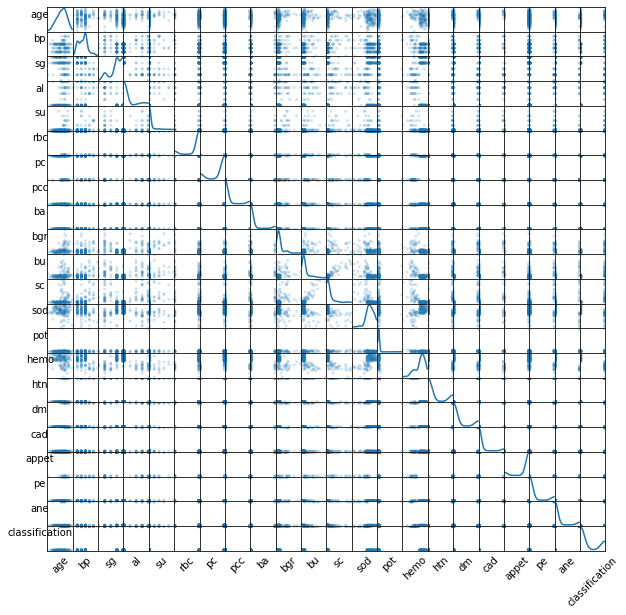

In [15]:
%matplotlib inline
sm = scatter_matrix(dataframe, alpha = 0.2, figsize=(10,10), diagonal="kde")

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)];

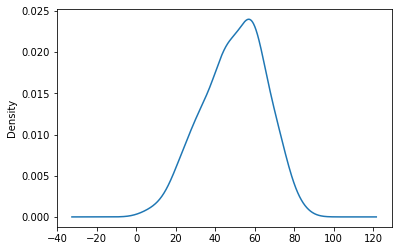

In [16]:
%matplotlib inline
dataframe.age.plot.kde()

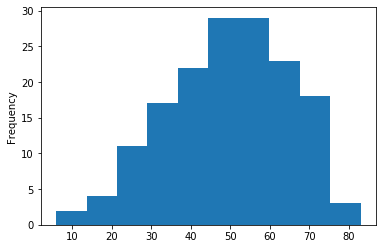

In [17]:
dataframe.age.plot.hist()

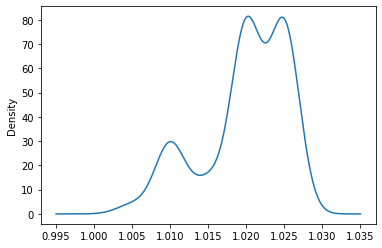

In [18]:
%matplotlib inline
dataframe.sg.plot.kde()

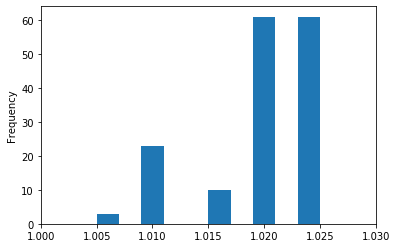

In [19]:
dataframe.sg.plot.hist(xlim=(1.000,1.030))

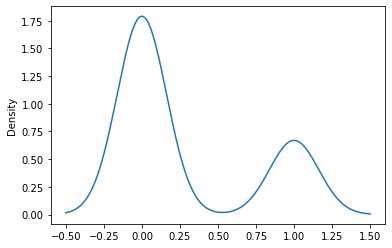

In [20]:
dataframe.classification.plot.kde()

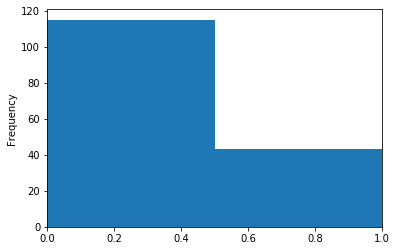

In [21]:
dataframe.classification.plot.hist(xlim=(0,1),bins = 2)

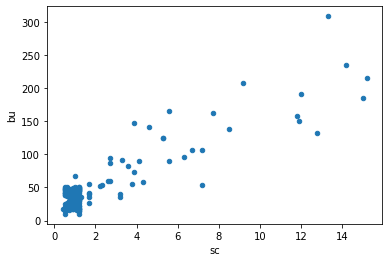

In [22]:
dataframe.plot.scatter(x="sc",y="bu")

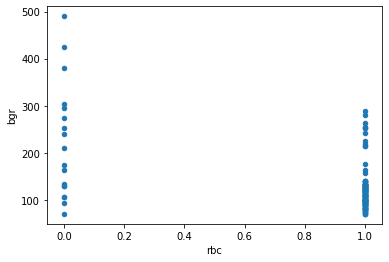

In [23]:
dataframe.plot.scatter(x="rbc",y="bgr")

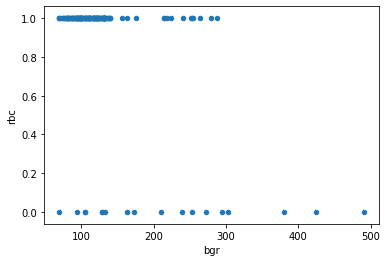

In [24]:
dataframe.plot.scatter(x="bgr",y="rbc")

<IPython.core.display.Javascript object>


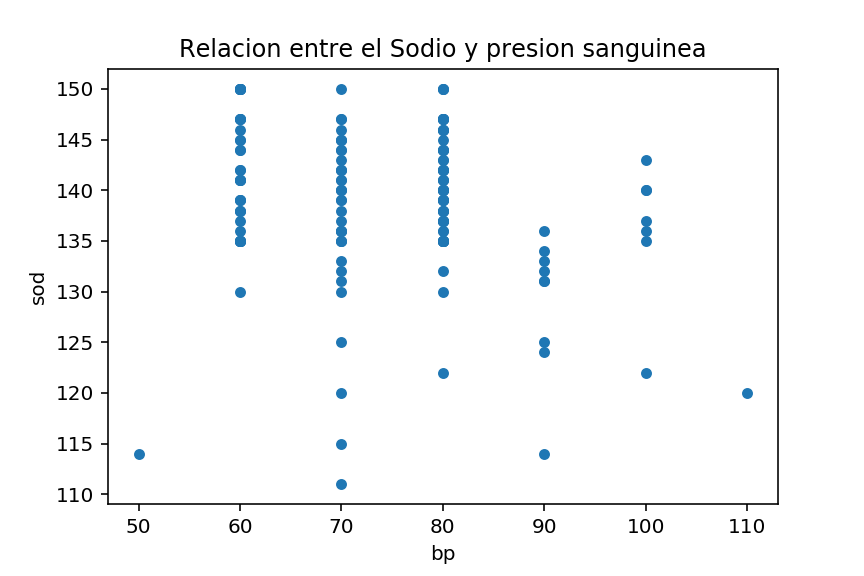

Text(0.5, 1.0, 'Relacion entre el Sodio y presion sanguinea')

In [27]:
%matplotlib notebook
dataframe.plot.scatter(x="bp",y="sod")
plt.title("Relacion entre el Sodio y presion sanguinea")

In [28]:
valor_por_edad = dataframe.groupby("age")["bp"].mean()
valor_por_edad.head()

age
6.0     60.0
12.0    80.0
15.0    80.0
17.0    60.0
20.0    70.0
Name: bp, dtype: float64

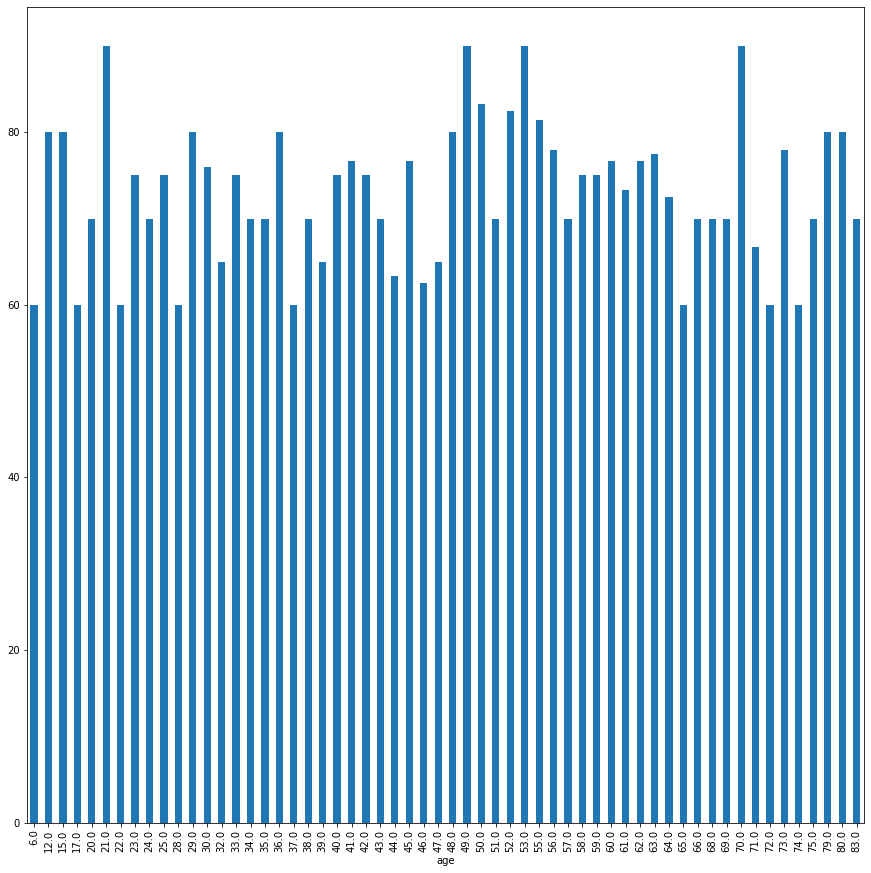

In [29]:
%matplotlib inline
valor_por_edad.plot.bar(figsize=(15,15))

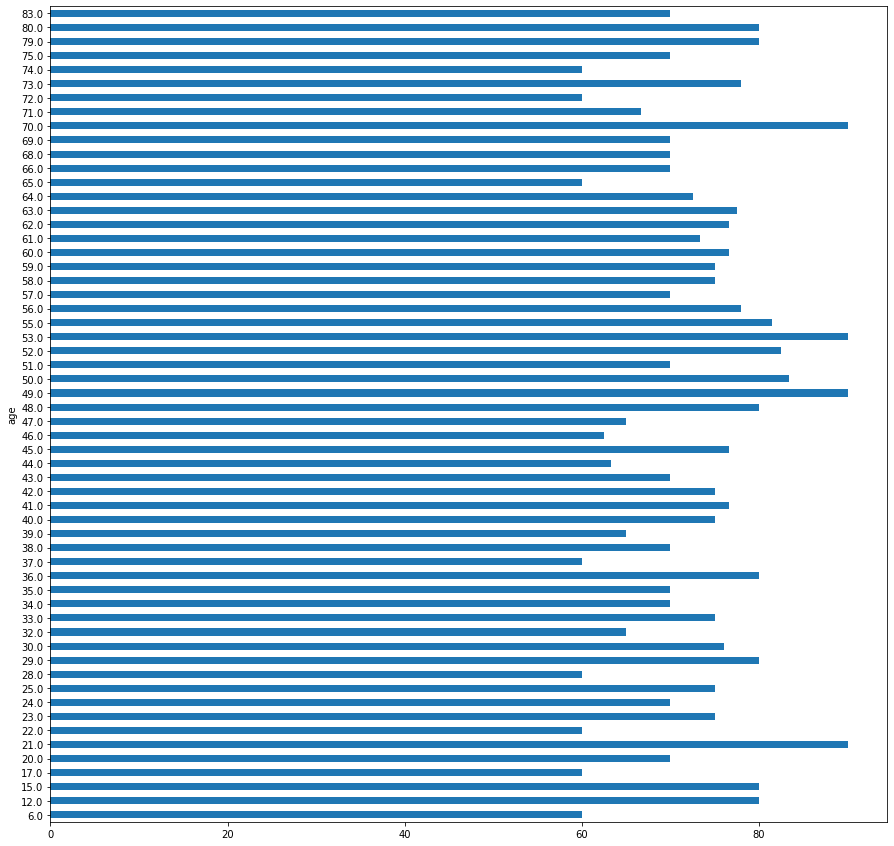

In [30]:
%matplotlib inline
valor_por_edad.plot.barh(figsize=(15,15))

In [31]:
diagnostico_edad = dataframe[(dataframe['classification']==1)]
diagnostico_por_edad = diagnostico_edad.groupby("age")["classification"].count()
diagnostico_por_edad.head()

age
6.0     1
21.0    1
40.0    1
45.0    1
46.0    1
Name: classification, dtype: int64

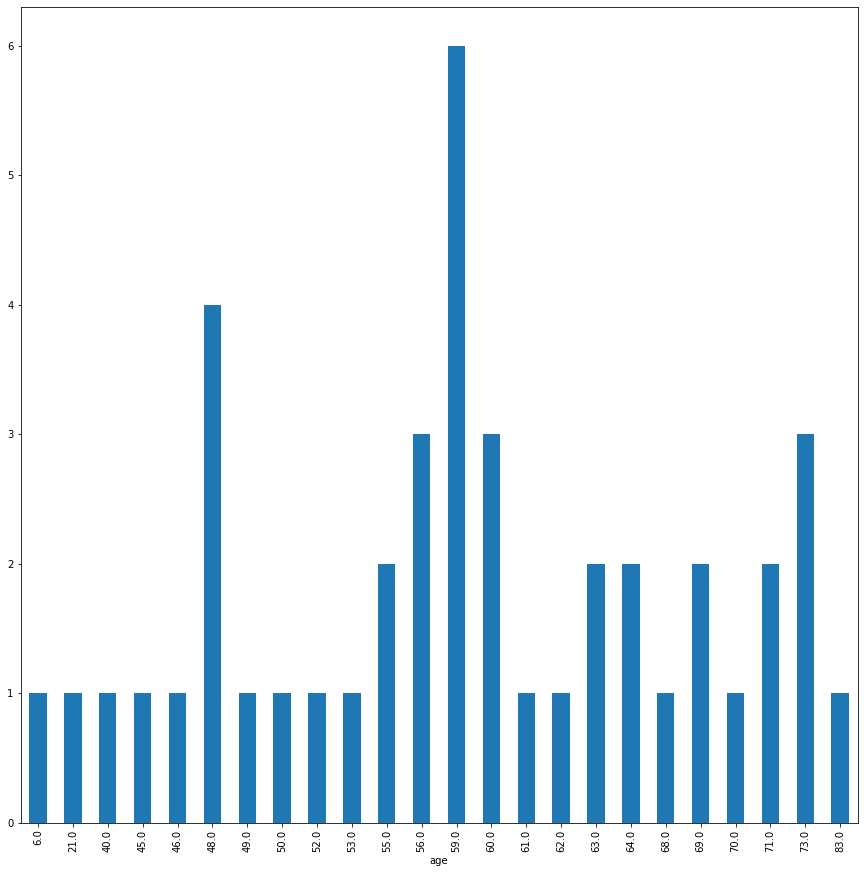

In [32]:
%matplotlib inline
diagnostico_por_edad.plot.bar(figsize=(15,15))

In [33]:
X = np.array(dataframe.drop(['classification'],1))
y = np.array(dataframe['classification'])
X.shape

(158, 24)

In [34]:
model = linear_model.LogisticRegression() 
model.fit(X,y)

//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictions = model.predict(X) 
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [36]:
model.score(X,y)

1.0

In [37]:
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [38]:
prob_predictions = model.predict_proba(X)
print(prob_predictions)

[[3.22024135e-04 9.99677976e-01]
 [3.37893033e-07 9.99999662e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.74253278e-10 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.32620778e-03 9.97673792e-01]
 [0.00000000e+00 1.00000000e+00]
 [3.05178105e-12 1.00000000e+00]
 [1.16919363e-09 9.99999999e-01]
 [2.56532573e-10 1.00000000e+00]
 [7.99360578e-15 1.00000000e+00]
 [3.26827454e-12 1.00000000e+00]
 [3.04900756e-03 9.96950992e-01]
 [2.08721929e-14 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.98805425e-12 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.06341621e-08 9.99999989e-01]
 [8.95494896e-03 9.91045051e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.05002968e-01 7.94997032e-01]
 [2.22044605e-16 1.00000000e+00]
 [1.70341452e-09 9.99999998e-01]
 [1.11708046e-03 9.98882920e-01]
 [3.34077772e-06 9.99996659e-01]
 [1.33226763e-15 1.00000000e+00]
 [1.727362

([array([ 42.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0., 115.]),
  array([115.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,  42.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

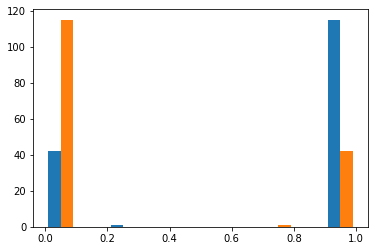

In [39]:
plt.hist(prob_predictions)

In [40]:
probs_df = pd.DataFrame(prob_predictions)

In [41]:
X_result = dataframe.reset_index().copy()
X_result["objetivo"] = y.tolist()
X_result["prediccion"] = predictions
X_result = pd.concat([X_result,probs_df],axis=1)
X_result[["objetivo","prediccion",0,1]]

,objetivo,prediccion,0,1
0,1,1,3.220241e-04,9.996780e-01
1,1,1,3.378930e-07,9.999997e-01
2,1,1,0.000000e+00,1.000000e+00
3,1,1,0.000000e+00,1.000000e+00
4,1,1,0.000000e+00,1.000000e+00
5,1,1,1.742533e-10,1.000000e+00
6,1,1,0.000000e+00,1.000000e+00
7,1,1,2.326208e-03,9.976738e-01
8,1,1,0.000000e+00,1.000000e+00
9,1,1,3.051781e-12,1.000000e+00


In [42]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=5, random_state=seed) 
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
print(msg)

Logistic Regression: 0.963636 (0.072727)


//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/sdc2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [43]:
predictions = model.predict(X_validation) 
print(accuracy_score(Y_validation, predictions))

1.0


In [44]:
print(confusion_matrix(Y_validation, predictions))

[[35  0]
 [ 0 13]]


In [45]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        13

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

